In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [11]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
# Respective pandas data frame
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


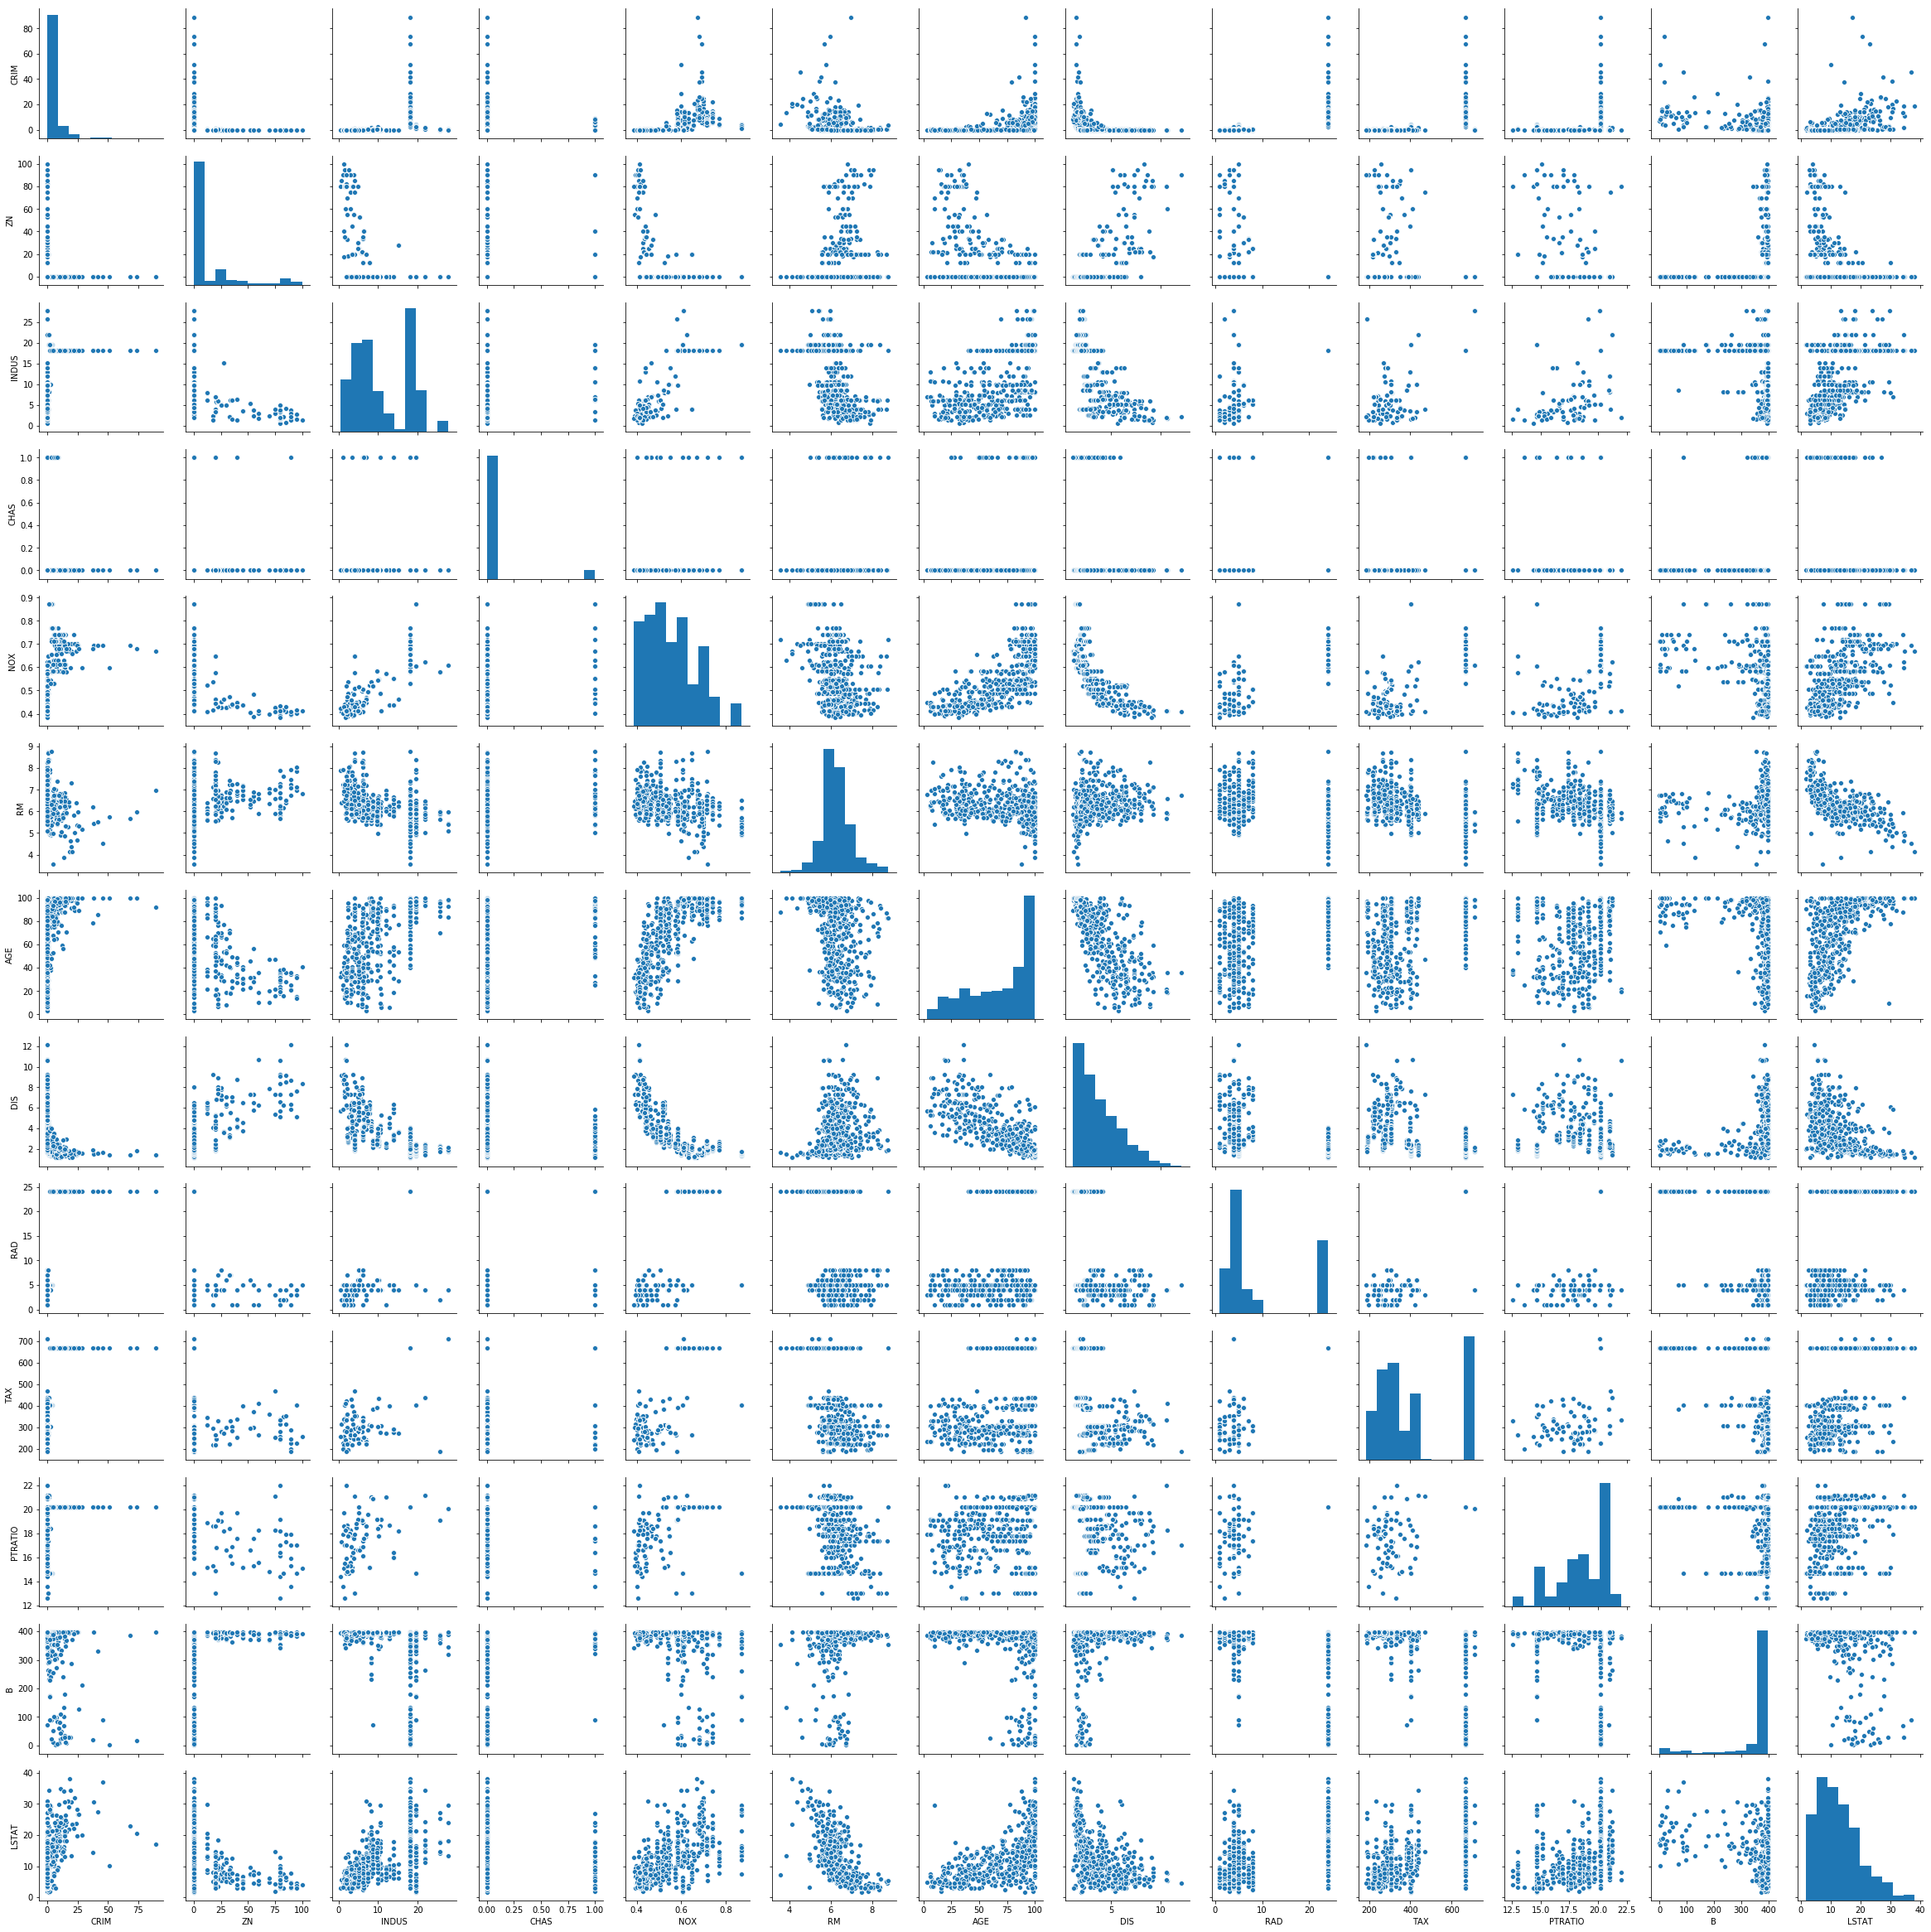

In [14]:
#Takes a while
sns.pairplot(df)

/Users/rene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


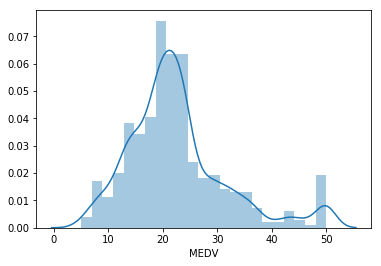

In [21]:
# Is the target normally distributed?
#It seems so but there are outliers
sns.distplot(df['MEDV'])

In [23]:
#Let us check if there is missing data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

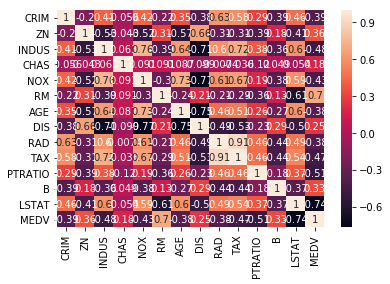

In [36]:
#Correlations (No high correlations apparently)
sns.heatmap(df.corr(),annot=True)

In [92]:
df.corr()[abs(df.corr())>= 0.6 ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,NaN,0.720760,NaN,NaN,0.603800,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808,0.695360
AGE,NaN,NaN,0.644779,NaN,0.731470,NaN,1.000000,-0.747881,NaN,NaN,NaN,NaN,0.602339,NaN
DIS,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.625505,NaN,NaN,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,0.668023,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


## Conclusion form staring at correlations

**Only two variables have correlations >= +-0.69 with MEDV (our target): RM y LSTAT. So we only going to use these two 
features to predict MEDV**

**Worth mentioning: RAD, TAX have a correlation of 0.91, i.e. they are probably collinear **

In [80]:
X=df[['LSTAT','RM']]
y=df['MEDV']

In [81]:
#Train/test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [82]:
# Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [83]:
print(lm.intercept_)

5.758638793520037


In [84]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LSTAT,-0.709943
RM,4.041137


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. RAD** is associated with an **increase of -0.0235**.
- Holding all other features fixed, a 1 unit increase in **Avg. SLAT** is associated with an **increase of -0.92**.


# Model predictions

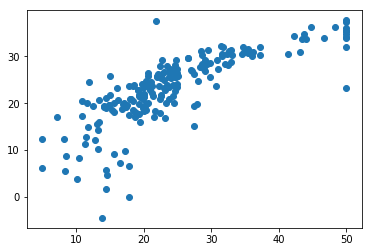

In [96]:
predictions = lm.predict(X_test)
predictions_train = lm.predict(X_train)
plt.scatter(y_test,predictions)

/Users/rene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


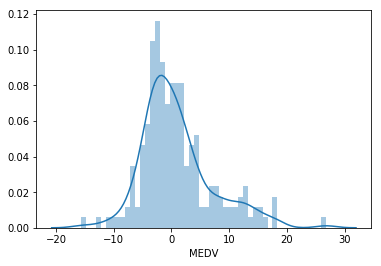

In [88]:
#Residual histogram 

sns.distplot((y_test-predictions),bins=50);

In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.495356837058761
MSE: 38.921906604625036
RMSE: 6.238742389666769


In [90]:
metrics.r2_score(y_test, predictions), metrics.r2_score(y_train, predictions_train)

(0.60253858004819, 0.6471466486814077)